# Case Study on Testing of Hypothesis
A company started to invest in digital marketing as a new way of their product promotions.For that they collected data and decided to carry out a study on it.

● The company wishes to clarify whether there is any increase in sales after stepping into digital marketing.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv("Sales_add.csv")
data.head(10)

,Month,Region,Manager,Sales_before_digital_add,Sales_After_digital_add
0,Month-1,Region - A,Manager - A,132921,270390
1,Month-2,Region - A,Manager - C,149559,223334
2,Month-3,Region - B,Manager - A,146278,244243
3,Month-4,Region - B,Manager - B,152167,231808
4,Month-5,Region - C,Manager - B,159525,258402
5,Month-6,Region - A,Manager - B,137163,256948
6,Month-7,Region - C,Manager - C,130625,222106
7,Month-8,Region - A,Manager - A,131140,230637
8,Month-9,Region - B,Manager - C,171259,226261
9,Month-10,Region - C,Manager - B,141956,193735


In [3]:
data.columns

Index(['Month', 'Region', 'Manager', 'Sales_before_digital_add',
       'Sales_After_digital_add'],
      dtype='object')

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22 entries, 0 to 21
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Month                     22 non-null     object
 1   Region                    22 non-null     object
 2   Manager                   22 non-null     object
 3   Sales_before_digital_add  22 non-null     int64 
 4   Sales_After_digital_add   22 non-null     int64 
dtypes: int64(2), object(3)
memory usage: 1008.0+ bytes


#### Month, Region and Manager are of object type. Sales_before_digital_add and Sales_After_digital_add are of int64 type.

In [5]:
data.shape

(22, 5)

#### In this Sales_add data set, there are 22 rows and 5 columns.

In [6]:
data.corr()

,Sales_before_digital_add,Sales_After_digital_add
Sales_before_digital_add,1.000000,-0.178668
Sales_After_digital_add,-0.178668,1.000000


#### Sales before digital add and sales after digital add shows negative correlation. This indicates that both the variables move in opposite direction.

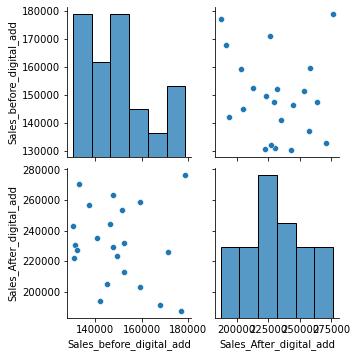

In [7]:
sns.pairplot(data)

<AxesSubplot:>

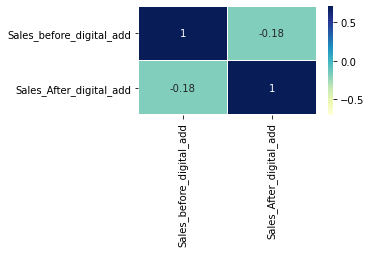

In [8]:
corrmatrix = data.corr()
plt.subplots(figsize=(4,2))
sns.heatmap(corrmatrix,vmin=-.7,vmax=0.7,annot=True,linewidth=0.2,cmap ="YlGnBu")

#### Null hypothesis H0 : There is an decrease in sales after digital add.

Alternate hypothesis H1 : There is a increase in sales after digital add.

In [11]:
from scipy import stats
r,p = stats.pearsonr(data.Sales_before_digital_add,data.Sales_After_digital_add)

print("Correlation coefficient is",round(r,4))
print("P value is",round(p,10))

Correlation coefficient is -0.1787
P value is 0.4262979089


In [12]:

if p < 0.05:
    print ('Reject null hypothesis')
else:
    print("Do not reject null hypothesis")

Do not reject null hypothesis


#### It is concluded the there is a relationship between sales before and after digital add.

## ● The company needs to check whether there is any dependency between the features “Region” and “Manager”.


In [14]:
data.columns

Index(['Month', 'Region', 'Manager', 'Sales_before_digital_add',
       'Sales_After_digital_add'],
      dtype='object')

In [15]:
data.describe(include=["object"])

,Month,Region,Manager
count,22,22,22
unique,22,3,3
top,Month-20,Region - A,Manager - A
freq,1,10,9


In [16]:
data['Region'].nunique()

3

In [19]:
data['Region'].unique()


array(['Region - A', 'Region - B', 'Region - C'], dtype=object)

In [20]:
data['Manager'].nunique()

3

In [21]:
data['Manager'].unique()

array(['Manager - A', 'Manager - C', 'Manager - B'], dtype=object)

Null hypothesis: There are no relationships between the  variables. 
Alternative hypothesis: There are relationships between the variables.

In [24]:
pd.crosstab(data.Region, data.Manager)

Manager,Manager - A,Manager - B,Manager - C
Region,,,
Region - A,4,3,3
Region - B,4,1,2
Region - C,1,3,1


In [25]:
from scipy.stats import chi2_contingency
stat, p_value, dof, expected = chi2_contingency(pd.crosstab(data.Region, data.Manager))

In [26]:
print('chi-square statistic:',stat)
print('p-value:',p_value)
print('Degree of Freedom: ',dof)

chi-square statistic: 3.050566893424036
p-value: 0.5493991051158094
Degree of Freedom:  4


In [27]:
alpha = 0.05
if p_value <= alpha:
    print("Reject H0,There is a relationship between Region and Manager")
else:
    print("Retain H0,There is no relationship between Region and Manager")

Retain H0,There is no relationship between Region and Manager


#### For a Chi-square test, a p-value that is less than or equal to your significance level it is conclude that a relationship exists between the categorical variables.In this case, value of p is greater than alpha. So Null hypothesis is accepted means there is no relationship between Region and Manager.